In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#Load amazon movie data into pandas with labels.
df = pd.read_csv('amazon_movies & ratings.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

In [4]:
df.head(6)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806


In [5]:
df.shape

(100000, 4)

In [6]:
# Ratings Summary
df.describe()['rating'].T

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Ratings are given on the scale of 1-5

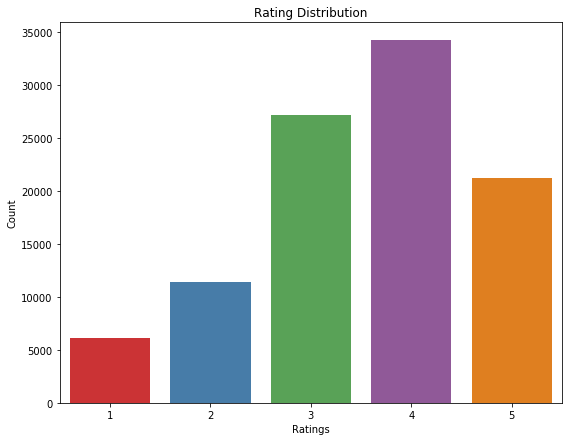

In [7]:
# Checking the distribution of Rating
plt.figure(figsize=(9,7))
sns.countplot(x = df['rating'], data=df, palette = 'Set1')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating Distribution');

#### Checking which movies have maximum ratings?

In [13]:
max_rat = df.groupby('movie_id')['rating'].count().sort_values(ascending = False).head(10)
max_rat

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: rating, dtype: int64

``583`` ratings have been given to movie with the id ``50`` , the highest amongst all.

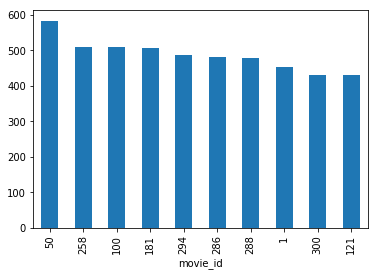

In [17]:
max_rat.plot(kind='bar');

#### What is the average rating for each movie? Define the top 5 movies with the maximum average ratings.

In [18]:
df.groupby('movie_id')['rating'].mean().sort_values(ascending = False).head(20)

movie_id
1293    5.000000
1467    5.000000
1653    5.000000
814     5.000000
1122    5.000000
1599    5.000000
1201    5.000000
1189    5.000000
1500    5.000000
1536    5.000000
1449    4.625000
1642    4.500000
119     4.500000
1398    4.500000
1594    4.500000
408     4.491071
318     4.466443
169     4.466102
483     4.456790
114     4.447761
Name: rating, dtype: float64

Maximum average rating is ``5`` which is the last number on scale. 5 movies that have received the maximum average ratings are ``1293`` ``1467`` ``1653`` ``814`` ``1122``

#### Defining Top 5 movies with the least audience.

In [19]:
df.groupby('movie_id')['user_id'].count().sort_values(ascending = True).head(5)

movie_id
1682    1
814     1
1447    1
1593    1
1452    1
Name: user_id, dtype: int64

#### Declaring the number of Users and movies

In [20]:
#Declare number of users and movies.
n_users = df.user_id.unique().shape[0]
n_movies = df.movie_id.unique().shape[0]  

print('Total No. of Users :', n_users)
print('Total No. of Movies :', n_movies)

Total No. of Users : 943
Total No. of Movies : 1682


In [21]:
#Creates a train test split of 75/25.
train_data, test_data = train_test_split(df, test_size=0.25)

In [22]:
print('Train data shape :', train_data.shape)
print('Test data shape :', test_data.shape)

Train data shape : (75000, 4)
Test data shape : (25000, 4)


In [23]:
#Populates a train and test matrix (user_id x movie_id), containing ratings.
train_data_matrix = np.zeros((n_users, n_movies))
for line in train_data.itertuples():
    #[user_id index, movie_id index] = given rating.
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  
    
train_data_matrix.shape    

(943, 1682)

In [24]:
test_data_matrix = np.zeros((n_users, n_movies))
for line in test_data.itertuples():
    #[user_id index, movie_id index] = given rating.
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
test_data.shape    

(25000, 4)

In [26]:
#Creates cosine similarity matrices for users and movies. 
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
movie_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

print('Users Similarity :', user_similarity.shape)
print('Movies SImilarity :', movie_similarity.shape)

Users Similarity : (943, 943)
Movies SImilarity : (1682, 1682)


In [27]:
## Predictions 
#User-Movie Collaborative Filtering, difference from mean rating is a better indicator than absolute rating.
mean_user_rating = train_data_matrix.mean(axis=1)[:, np.newaxis] 
ratings_diff = (train_data_matrix - mean_user_rating) 
user_pred = mean_user_rating + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T

In [28]:
#Movie-Movie collaborative Filtering
movie_pred = train_data_matrix.dot(movie_similarity) / np.array([np.abs(movie_similarity).sum(axis=1)])

In [30]:
#Root Mean Squared Error for validation.
def rmse(pred, test):
    pred = pred[test.nonzero()].flatten() 
    test = test[test.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, test))

In [32]:
print("Collaborative Filtering RMSE")
print('User-based: ', rmse(user_pred, test_data_matrix))  
print('Movie-based: ', rmse(movie_pred, test_data_matrix))

Collaborative Filtering RMSE
User-based:  3.1277738336582694
Movie-based:  3.4568346213533707
